# Generating Fractals

Here we will be generating fractals and learning about a few things as well

1. Complex numbers (very breifly) 
2. Root finding (this is a good primer for gradient decent for those of you with ML on the mind) 
3. Thinking iteratively ( very important nor numerical mathematics) 

## Complex Numbers

Before we start talking about fractals, we should probably introduce the idea of a complex number before hand, as the fractas we will be generating rely heavily on them. I'll note that this may get kind of deep into some mathematics, and if you want to skip this section you totally can. There are som quirks to complex numbers, but luckily Python will handle them for you, and realistically they will behave like any other number in Python (for our purposes).

First and foremost, let us introduce the complex number $i$
$$
\begin{equation}
i  = \sqrt{-1} \implies i^2 = -1
\end{equation}
$$

where $i$ is known as the imaginary number, or a number that when multiplied by itself, returns a negative number, an impossible situation in the real numbers (the set of numbers including integers, natural numbers, rational and irrational numbers). At first this might be concerning, but we must remember that when it comes to math, there is no concensus on whether math is discovered or invented. People thought [mathematicians who suggested working with complex numbers were crazy](https://medium.com/i-math/imaginary-numbers-explained-e5aa63bdb7ae), only for time to reveal that complex number were applicable in many areas, including [electrical engineering](https://www.electronics-tutorials.ws/accircuits/complex-numbers.html).

More often than not, we will write a complex number as $z$, which is written as the sum of an imaginary numers real and complex parts, 

$$
z = a + ib
$$
where $a$ and $b$ are both real numbers and $i = \sqrt{-1}$.

If you're curious, you can get more details about complex numbers using the drop down below. For our purposes however, all that you really need to know is the following:

1. A complex number $a + ib$ can be thought of as the classical $x,y$ ordered pair we're used to. In this case our $x$ axis is the real part of the number, and our $y$ axis is the imaginary part of the number

2. These $(a, b)$ ordered pairs can be used to define the "complex plane", which we will use to plot our fractals

<details closed>
    <summary> <h1> More details on complex numbers (not required)</h1></summary>

<br>
There are a lot of very useful properties that come from imaginary numbers, and they're used all the time in fiels such as pure mathematics, signal processing, physics, chemistry, fluid dynamics... in principle we could go on forever. The largest reason for this is due to something known as [eulers formula](https://en.wikipedia.org/wiki/Euler%27s_formula), where we instead think of complex numbers on the "complex plane", with the real part of the function $a$ representing our $x$ axis, and the imaginary part of our function $b$ on the $y$ axis. Euler's formula states that we can write the exponential of a complex number as follows

$$
e^{ix} = r (\cos \theta + i\sin \theta)
$$
where $r$ is the radius of tihs circle on the complex plane (more on this later).
For those of you mathematically inclined and want to prove this, the easiest way is to write out the Taylor series for each $e^{ix}, i\sin \theta$ and $\cos \theta$, and you may be surprised what you see. 

Long story short, using Euler's formula, we can essentially write any complex number in terms of sine and cosine, this is useful for a whole lot of reasons, but for fractals specificially, this implies periodic boundary conditions -- we expect to see repeating patterns. Indeed, as cosine and sine have $N$ roots repeating every $\pi$, we expect that our complex functions may also have (up to) that many roots!




### Finding Roots Of Complex Polynomials

We all remember polynomial equations of real numbers, for example the quadratic function

$$
x^2 - C = 0
$$
where we can all read quite readily that the solution to this equation is $x = \pm \sqrt{C}$. But what about if we have some complex polynomial like

$$
z^2 + C = 0,
$$

To be honest, I pulled a fast one on you. It' just as easy! In this case, we have two roots which are $\pm i \sqrt{C} $, where we just bring our friend the imaginary unit along for the ride. In principle what we do is we once again factor this into the real and imaginary part of the solution, but often it's easier to think of this (in a way that will make mathmaticians cry) we simply get rid of the part we don't like, and call it $i$. For quadratic complex polynomial equations, we can simply use the quadratic formula and sprinkle in the imaginary unit where ever we need it. This is a bit of an over simplification, but for our purposes it should be fine. 

Where this can get a little spicier is when the roots aren't obvious enough to be read off. For example, the equation

$$
z^3 = 1,
$$

is cubic, which means we have three distinct roots which satisfy this equation. In this case, it is easier to look at our friend Euler's formula to find these roots. So let's rewrite our complex equation above using euler's formula. First, the left hand side

$$
z = r e^{ix} \implies z^3 = r^3 e^{3ix}
$$

and the right hand side:

$$
1 = re^{ix} = r (\cos \theta + i\sin \theta)
$$

Where, as one has no complex component, we know that this must be one. Therefore, $r$ is equal to one in this equation, angles are those where cosine is one and sine is zero, or  $\theta = 2\pi k$ where $k$ is an integer. Therefore, we have 

$$
e^{3ix} = e^{2\pi k}
$$

or by taking the natural logarithm of each side,

$$
ix = \frac{2 \pi k}{3} 
$$

And going back to our original equation:

$$
z = e^{ix} = e^{\frac{2 \pi k}{3}}
$$

Where we can take our first three roots as $k = -1, 0, 1$ and obtain

$$
z = 1, e^{2\pi i/3}, e^{-2\pi i/3}
$$

We also note we have periodic roots at integer values of $k$, but we won't worry about those. Knowing these roots are useful in terms of understanding the behaviour of our fractals. We may expect that different roots may cause different basins of convergence, or result in rotations of our fractal. This is also important with respect to establishing the domains in which our fractals may exist.
</details>

# Root Finding With Complex Numbers

If you were crazy enough to read the drop down menu, you may have noticed that finding roots to complex equations were more work that the quadratic formula. And if you take anything away from these notebooks it should be that we Data Scientists (and regular scientists) are _super_ lazy. Wouldn't it be nice if we could use our computer to solve these for us? Luckily, the answer is a resounding yes! And even more better is that our Newton Raphson formula from before generalizes to the complex domain without us having to do anything. Convenient! 

One thing to be aware of however in Python is we will need to define complex numbers. It's quite simple. For a complex number $ a + ib$, we can define that in python like

```python3
a = b = 1
complex_number = complex(a, b)
```

and we can then throw that number at our root finding routines as we did before and find ourselves solutions.

## My First Fractal: Mandelbrot

Before we go into root finding for fractals, let's start with a relatively simple one to generate the Mandelbrot.  Rather than have me drone on for a year, here's a YouTube video that does a better job than I could explaining that set. 

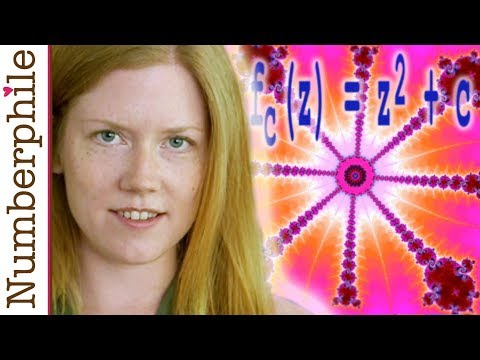

In [20]:
from IPython.display import YouTubeVideo
YouTubeVideo('NGMRB4O922I')

# Your Task

Write two functions, the first function will be to calculate the Mandelbrot set as follows

### Mandelbrot Function
1. Initialize $z$ and the number of iterations $n$ as zero,
    - Also intialize the maximum iterations as 80
2. while `abs(z) <= 2 and n < max_iter` do the following
    * $z = z^2 + c$
    * n += 1
3. On exit, return the number of iterations $n$

In [ ]:
# note the **kwargs is not strictly necessary, and won'tdo anything here, but will be useful
# if you want to use some of the provided functions later. 

def mandelbrot(c, max_iter = 80, **kwargs):
    '''
    here c is any complex number, and max_iter is the maximum numberof iterations through your loop
    you want to go
    '''
    z = # YOUR CODE HERE
    n = # YOUR CODE HERE
    while CONDITION: # YOUR CODE HERE
        z = SOMETHING #YOUR CODE HERE
        n += 1
    
    return n
    

### Iteration Function

You will also need a function which iterates across the complex plane to see what pixel you should generate there. This function itself will require three functions

1. A scale function to convert pixel location into complex coordinates
2. A scale function to convert the number of itereations in your `mandelbrot` function into an RGB color scale
3. A function which iterates over pixels with a given height and width for your image. 

In principle we will have the following pseudocode for point 3 which will encompass the other functions

---
```python
def CreateImage(mandelbrot, height, width, domain):

    ImageMap = np.zeros([width, height])
  
    for x in range(0, width):
        for y in range(0, height):
            
            c = scale_function_coordinate(x, y, width, height, real_max, real_min, complex_max, complex_min)
            
            m = mandelbrot(c)
            
            color = color_function(m)
            
            X[x,y] = color
   
   return ImageMap
    
```
---
Where let's outline those functions explicitly 

##### Pixel Scale Function

Given a pixel coordinate $x$ and $y$, we need to convert this location into a complex number within our domain. the formula for this is as follows

$$
R = R_{min} + \frac{x}{\text{Image Width}} \times (R_{max} - R_{min})
$$

Where $R$ is your value in the real coordinate, $R_{min}$ is the smallest value in the real domain, and $R_{max}$ is the largest value in the real domain, $x$ is the current pixel, and Image Width is the width of the image in pixels you want to create. A similar formula for the complex domain is as follows 

$$
C = C_{min} + \frac{x}{\text{Image Height}} \times (C_{max} - C_{min})
$$

Where $C$ is your value in the complex coordinate, $C_{min}$ is the smallest value in the complex domain,  $C_{max}$ is the largest value in the complex domain, $x$ is the current pixel, and Image Height is the height of the image in pixels you want to create. 

In this case, if we have a known image size in advance, and we know the domain in which our fractal will exist, we can calculate the complex value $c$ at this place in our image. Please fill in the function below

In [ ]:
import numpy as np
def scale_function_coordinate(x, y, width, height, r_max, r_min, c_max, c_min):
    '''
    x --> x coordnate of pixel
    y --> y coordinate of pixel
    
    width --> width of image
    height --> height of image
    
    r_max, r_min --> maximum and minimum numbers on thereal axis
    c_max, c_min --> maximum and minimum numbers on the complex axis
    '''
    
    R = None # YOUR CODE HERE
    C = None # YOUR CODE HERE
    
    return complex(R, C) # complex is a built in function for complex numbers
    
    

##### Color Function

Now we need to be able to convert the number of iterations to an RGB coordinate. RGB colors can take values between 0 and 255, so we need to find a way to scale our number of iterations to become some pretty colors so we can observe the changes. Rather than boring you with this, I'll just provide the function 

In [ ]:
def color(number_of_iterations):
    return 255 - int(m * 255/max_iter)


## Putting it All Together

If that worked out well for you, you should be able to fill in the following to create your image functions!


In [ ]:
# Boundaries for the mandelbrot function 
bounds = [-2, 1, -1, 1]

def CreateImage(function, width, height, bounds): 
    r_max, r_min, c_max, c_min = bounds

    if width > 1000:
        print(f'width of {width} is too large. Your computer only has so many pixels.')
        print("try zooming in with a smaller boundary to observe more detail")
        return
        
    if height > 1000:
        print(f'height of {height} is too large. Your computer only has so many pixels.')
        print("try zooming in with a smaller boundary to observe more detail")
        return
    
    X = np.zeros(width, height)
    
    for x in range(0, width):
        for y in range(0, height):
            c = scale_function_coordinate(x, y, width, height, r_max, r_min, c_max, c_min)
            
            # Note here for changes later for root finding 
            m = function(c)
            color = color(m)
            X[width, height] = color
    
    return X

# When you're ready uncomment this line to see if it worked

# plt.imshow(X)

If all that worked out, running the above cell should produce what you see below!

In [ ]:
import sys
sys.path.append('scripts/')
import fractalfuncs as FF
import matplotlib.pyplot as plt

bounds = [-2, 1, -1, 1]
X = FF.CreateImageMap(function = FF.mandelbrot, function_args = {}, bounds = bounds)       
plt.imshow(X, extent=bounds)
plt.xlabel("Real Axis", size = 12)
plt.ylabel("Imaginary Axis", size = 12)
plt.show()

# Using Rootfinding

Now, rather than using the mandelbrot set, let's try and use our root finding techniques to find roots instead! If we're in a stable region,it should be pretty easy! If not, it will get spicy and diverge. We will use that divergence to create our fractals instead. Here the fractal properties not only come from the mathematical formulation of our complex set, but also the convergence properties of our root finder: different root finding techniques will result in different fractals.

## Your Task

Copy and paste your NewtonRaphson root finder from the Root Finding portion of this, and use it in this assignment. **NOTE** instead of returning the root, you will have to modify your NewtonRaphson function to return the number of iterations it took.

To use root finding, we will do exactly what we did for the mandelbrot set above, however, we will now modify your image generation function to use $c$ as an initial guess at your solution, and see if your NewtonRaphson root finder can find a solution or not. You will need to modify the cell below for use with your own function. Remember that you will also need to pass the derivative and the function you are evaluating (Hint: `**kwargs` can be handy here) 


In [ ]:
def CreateImageRootFinding(YOUR ARGUMENTS HERE, width, height, bounds): 
    r_max, r_min, c_max, c_min = bounds

    if width > 1000:
        print(f'width of {width} is too large. Your computer only has so many pixels.')
        print("try zooming in with a smaller boundary to observe more detail")
        return
        
    if height > 1000:
        print(f'height of {height} is too large. Your computer only has so many pixels.')
        print("try zooming in with a smaller boundary to observe more detail")
        return
    
    X = np.zeros(width, height)
    
    for x in range(0, width):
        for y in range(0, height):
            INITIAL_GUESS = scale_function_coordinate(x, y, width, height, r_max, r_min, c_max, c_min)
            
            # Note you may need to wrap this in try/except to prevent accidental zero division/other nastiness
            m = MY_ROOT_FINDER(INITIAL_GUESS)
            color = color(m)
            X[width, height] = color
    

## First Fractal With Root Finding

The mandelbrot set works well for what it is, but alas, if you try to use thet function in root finding, you will find that your fractal is dreadfully boring. A more interesting function is

$$
f(z) = z^3 - 1
$$

Whose derivative is

$$ 
f^\prime(z) = 3z^2
$$

### Sanity Check

See if you can reproduce the image below with your own function

In [ ]:
def function(z):
    return z**3 - 1

def derivative(z):
    return 3 * z ** 2

bounds = [-1,1,-1,1]

newton_args = dict(fprime = derivative, f = function, max_iter = 200, prec = 1e-6)
X = FF.CreateImageMap(FF.NewtonRaphsonFact, newton_args, bounds, height=250, width=250)

plt.imshow(X, extent=bounds)
plt.xlabel("Real Axis", size = 12)
plt.ylabel("Imaginary Axis", size = 12)
plt.show()

Using the function above, try playing around with the following: 

1. Different powers of $z$ 
2. Change the constant (-1) term. Larger/Smaller positive/negative. What if this term is complex?

What do you observe about the fractal at higher powers and different values of the constant

# Other Functions To Try

Once you've got that working, you should try these functions as well and see what fractals you observe!

$$
\begin{aligned}
f(z) &= \sin(z), x \in \left[-\frac{\pi}{2} - \frac{1}{2}, -\frac{\pi}{2} + \frac{1}{2}\right], y\in \left[-0.3, 0.3\right] \\
f(z) &= \cosh(z) - 1, x \in \left[-0.2, 0.2\right], y \in \left[-\pi, -\pi -\frac{\pi}{8}\right]\\
f(z) &= z^3 - 3^z, x\in [-10, 10], y\in[-10, 10]
\end{aligned}
$$

Note that if you don't know how to calculate a derivative, that's okay, you can use wolfrapmalpha, or alternatively, you can take them numerically with a function i've provided. It can be used as follows

```python
# Only if you haven't imported it already
import sys
sys.path.append('scripts/')
import fractalfuncs as FF
def myfunction(z):
    return z**2 # for example

def myderivative(z):
    return FF.nderiv(myfunction, z)
```
I note that numerical derivatives are always worse than analytic ones, but that's okay for now. If anyone is interested I can talk about how that works later as well. 

## Bored of that? 

If you're bored, you can also try other root finding techniques instead of your newton solver! Here are some suggestions

1. [Secant Method](https://en.wikipedia.org/wiki/Secant_method#:~:text=In%20numerical%20analysis%2C%20the%20secant,difference%20approximation%20of%20Newton's%20method.)
2. [Halley's Method](https://en.wikipedia.org/wiki/Halley%27s_method#:~:text=In%20numerical%20analysis%2C%20Halley's%20method,Householder's%20methods%2C%20after%20Newton's%20method.)
3. [Schroder's Method](https://mathworld.wolfram.com/SchroedersMethod.html)

Note that these fractals are getting created with based on convergence properties of the above solvers. For example, the cells below outline the same function we used originially, just with their different methods of solving!

In [ ]:
def function(z):
    return z**3 - 1

def derivative(z):
    return 3 * z ** 2

def secondder(z):
    return 6 * z

bounds = [-1,1,-1,1]
secant_args  = dict(function = function, mult = 0.5)
X = FF.CreateImageMap(FF.secantfact, secant_args, bounds, height=100, width=100)
plt.imshow(X, extent=bounds)
plt.xlabel("Real Axis", size = 12)
plt.ylabel("Imaginary Axis", size = 12)
plt.show()

In [ ]:
bounds = [-1,1,-1,1]
schroder_args = dict(derivative = derivative, function = function,
                     secondder=secondder, prec = 1e-6, max_iter = 50)
X = FF.CreateImageMap(FF.schroderfact, schroder_args, bounds, height=100, width=100)
plt.imshow(X, extent=bounds)
plt.xlabel("Real Axis", size = 12)
plt.ylabel("Imaginary Axis", size = 12)
plt.show()

In [ ]:
bounds = [-1,1,-1,1]
halley_args = dict(derivative = derivative, function = function,
                     seconder=secondder, prec = 1e-6, max_iter = 50)
X = FF.CreateImageMap(FF.halleyfact, halley_args, bounds, height=100, width=100)
plt.imshow(X, extent=bounds)
plt.xlabel("Real Axis", size = 12)
plt.ylabel("Imaginary Axis", size = 12)
plt.show()

Where you'll notice each root finding technique has different convergence criteria, so the fractals generated are all slightly different. If you try the other fractals listed, you'll notice tht their fractal patterns will show even more variation 